# Load pytorch libraries

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Loss function, Hessian, and Gradient

<font color=red> YOUR CODE BELOW </font>

In [8]:


class LocalMinimumCost:

  def apply(self,x):
    return 10*(x[0]**2 + x[1]**2) +1000

  def grad(self,x):
    g = 20*x
    return g

  def Hessian(self,x):
    H = 20*torch.eye(2)
    return(H)


# MODIFY THE CLASS BELOW>

class SaddleCost:

  def apply(self,x):
    return 10*(x[0]**2 - x[1]**2) +1000 # Use this as the cost function

  def grad(self,x):

    return torch.tensor([20*x[0], -20*x[1]]) # MODIFY TO YOUR CODE HERE (What's the gradient of the cost function?)

  def Hessian(self,x):# MODIFY TO YOUR CODE HERE (Think about the definition of Hessian)
    H = torch.zeros(2)
    H = torch.tensor([[20, 0],
                      [0, -20]])
    return(H)

# SGD with momentum

Steepest descent with momentum can escape the saddle points, provided it is not exactly on the saddle point. When used in the mini-batch setting, the subsequent gradient estimates are random, and hence the approach is called as stochastic gradient descent. The randomness guarantees that the points are randomly perturbed from the saddle points, and steepest descent will push it out of the saddle points.

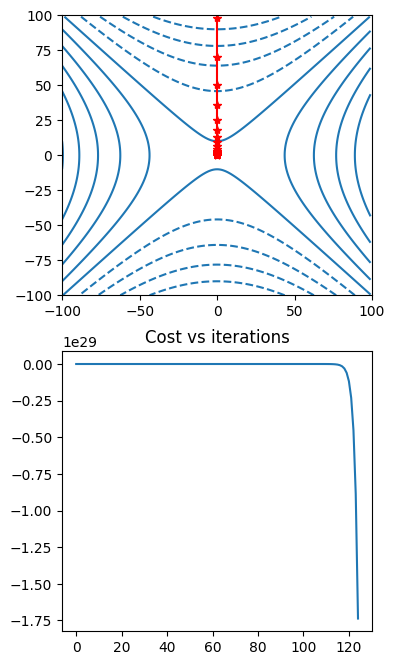

In [9]:
lossfn = SaddleCost()
#lossfn = LocalMinimumCost()

nepochs = 125

# If initialized at the saddle point, the iterates will stay at the saddle point
# Gradient is zero at the saddle point
#p = np.array((0.0,0.0))

# If initialized close to the saddle point, the iterates will move away from the saddle point
p = np.array((0.0,0.0001))

# If initialized away to the saddle point, the iterates will move away from the saddle point
#p = np.array((100.0,10.01))

p = torch.tensor(p).requires_grad_(True)
optimizer = optim.SGD([p], lr=0.02)
plist = np.zeros((2,nepochs))
clist = np.zeros(nepochs)

for i in range(nepochs):
  loss = lossfn.apply(p)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  plist[0,i] = p[0].detach().numpy()
  plist[1,i] = p[1].detach().numpy()
  clist[i] = loss.detach().numpy()

fig,ax = plt.subplots(2,1,figsize=(4,8))
x1, x2 = torch.meshgrid(torch.arange(-100, 100, 1), torch.arange(-100, 100, 1))
X = torch.stack((x1.ravel(),x2.ravel()))
cost = lossfn.apply(X).reshape(x1.shape)
ax[0].contour(x1, x2, cost, colors='#1f77b4',levels=10)
ax[0].plot(plist[0],plist[1],color='red')
ax[0].plot(plist[0],plist[1],'r*')
ax[0].set_xlim([-100,100])
ax[0].set_ylim([-100,100])
ax[1].plot(clist)
s=ax[1].set_title('Cost vs iterations')

# Newton optimization; convergence to saddle points in one step


Newton optimization will suck the iterates to the saddle points, if it is in the vicinity. This is a challenge associated with second order methods in neural network optimization.

Newton method will only work if the Hessian matrix is positive definite; i.e, all the eigen values are positive, which implies that it is close to a local minimum.


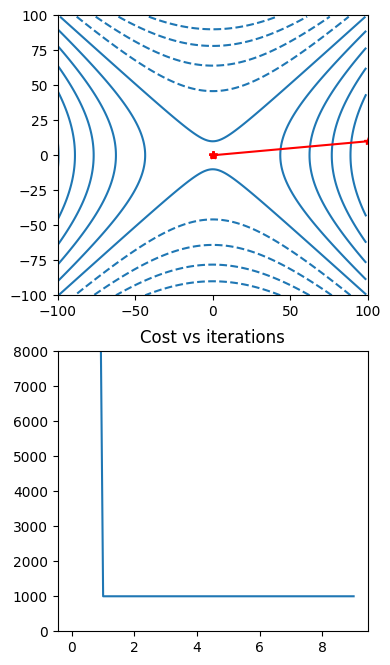

In [18]:

nepochs = 10
# If initialized at the saddle point, the iterates will stay at the saddle point
# Gradient is zero at the saddle point
#p = np.array((0.0,0.0))

# If initialized close to the saddle point, the iterates will converge to the saddle point
#p = np.array((0.0,0.01))

# If initialized away to the saddle point, the iterates will converge to the saddle point
p = np.array((100.0,10.01))

p = torch.tensor(p,dtype=torch.float).requires_grad_(True)

plist = np.zeros((2,nepochs))
losslist = np.zeros((1,nepochs))

clist = np.zeros(nepochs)

for i in range(nepochs):

  loss = lossfn.apply(p)

  plist[0,i] = p[0].detach().numpy()
  plist[1,i] = p[1].detach().numpy()
  clist[i] = loss.detach().numpy()

  grad = lossfn.grad(p)
  H = lossfn.Hessian(p)

  # YOUR CODE HERE to update weights using Newton Methods
  p = p - torch.matmul(torch.inverse(H.float()), grad.float()) # use the formula from the slids: w* = w - (H(w)^-1 * J(w))

fig,ax = plt.subplots(2,1,figsize=(4,8))
x1, x2 = torch.meshgrid(torch.arange(-100, 100, 1), torch.arange(-100, 100, 1))
X = torch.stack((x1.ravel(),x2.ravel()))
cost = lossfn.apply(X).reshape(x1.shape)
ax[0].contour(x1, x2, cost, colors='#1f77b4',levels=10)
ax[0].plot(plist[0],plist[1],color='red')
ax[0].plot(plist[0],plist[1],'r*')
ax[0].set_xlim([-100,100])
ax[0].set_ylim([-100,100])
ax[1].plot(clist)
ax[1].set_ylim([0,8000])
s=ax[1].set_title('Cost vs iterations')